In [34]:
import pandas as pd
from sklearn import preprocessing
import sklearn
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

In [61]:
def drawing1(main, support, generated):
    
    X  = main.iloc[:, 1]
    Y1 = support.iloc[:, 1]
    Y2 = generated.iloc[:, 1]
    
    plt.style.use('seaborn-whitegrid') 
    plt.figure(figsize=(8, 8), facecolor='lightgray')
    plt.title(f'\nBlue | X axis >> main | Y axis >> support\n\nOrange | X axis >> main | Y axis >> generated\n') 
    
    plt.scatter(X, Y1, s=0.1)    
    plt.scatter(X, Y2, s=0.1)
    
    plt.show() 

In [36]:
raw_train_data = pd.read_csv('..\\kaggle_data\\train.csv')
raw_test_data = pd.read_csv('..\\kaggle_data\\test.csv')
raw_sample_submission_data = pd.read_csv('..\\kaggle_data\\sample_submission.csv')

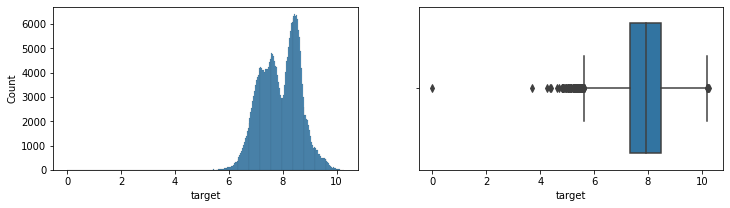

In [37]:
fig,ax = plt.subplots(1,2, figsize=(12,3))
sns.histplot(x=raw_train_data.target, ax=ax[0])
sns.boxplot(x=raw_train_data.target, ax=ax[1])
plt.show()

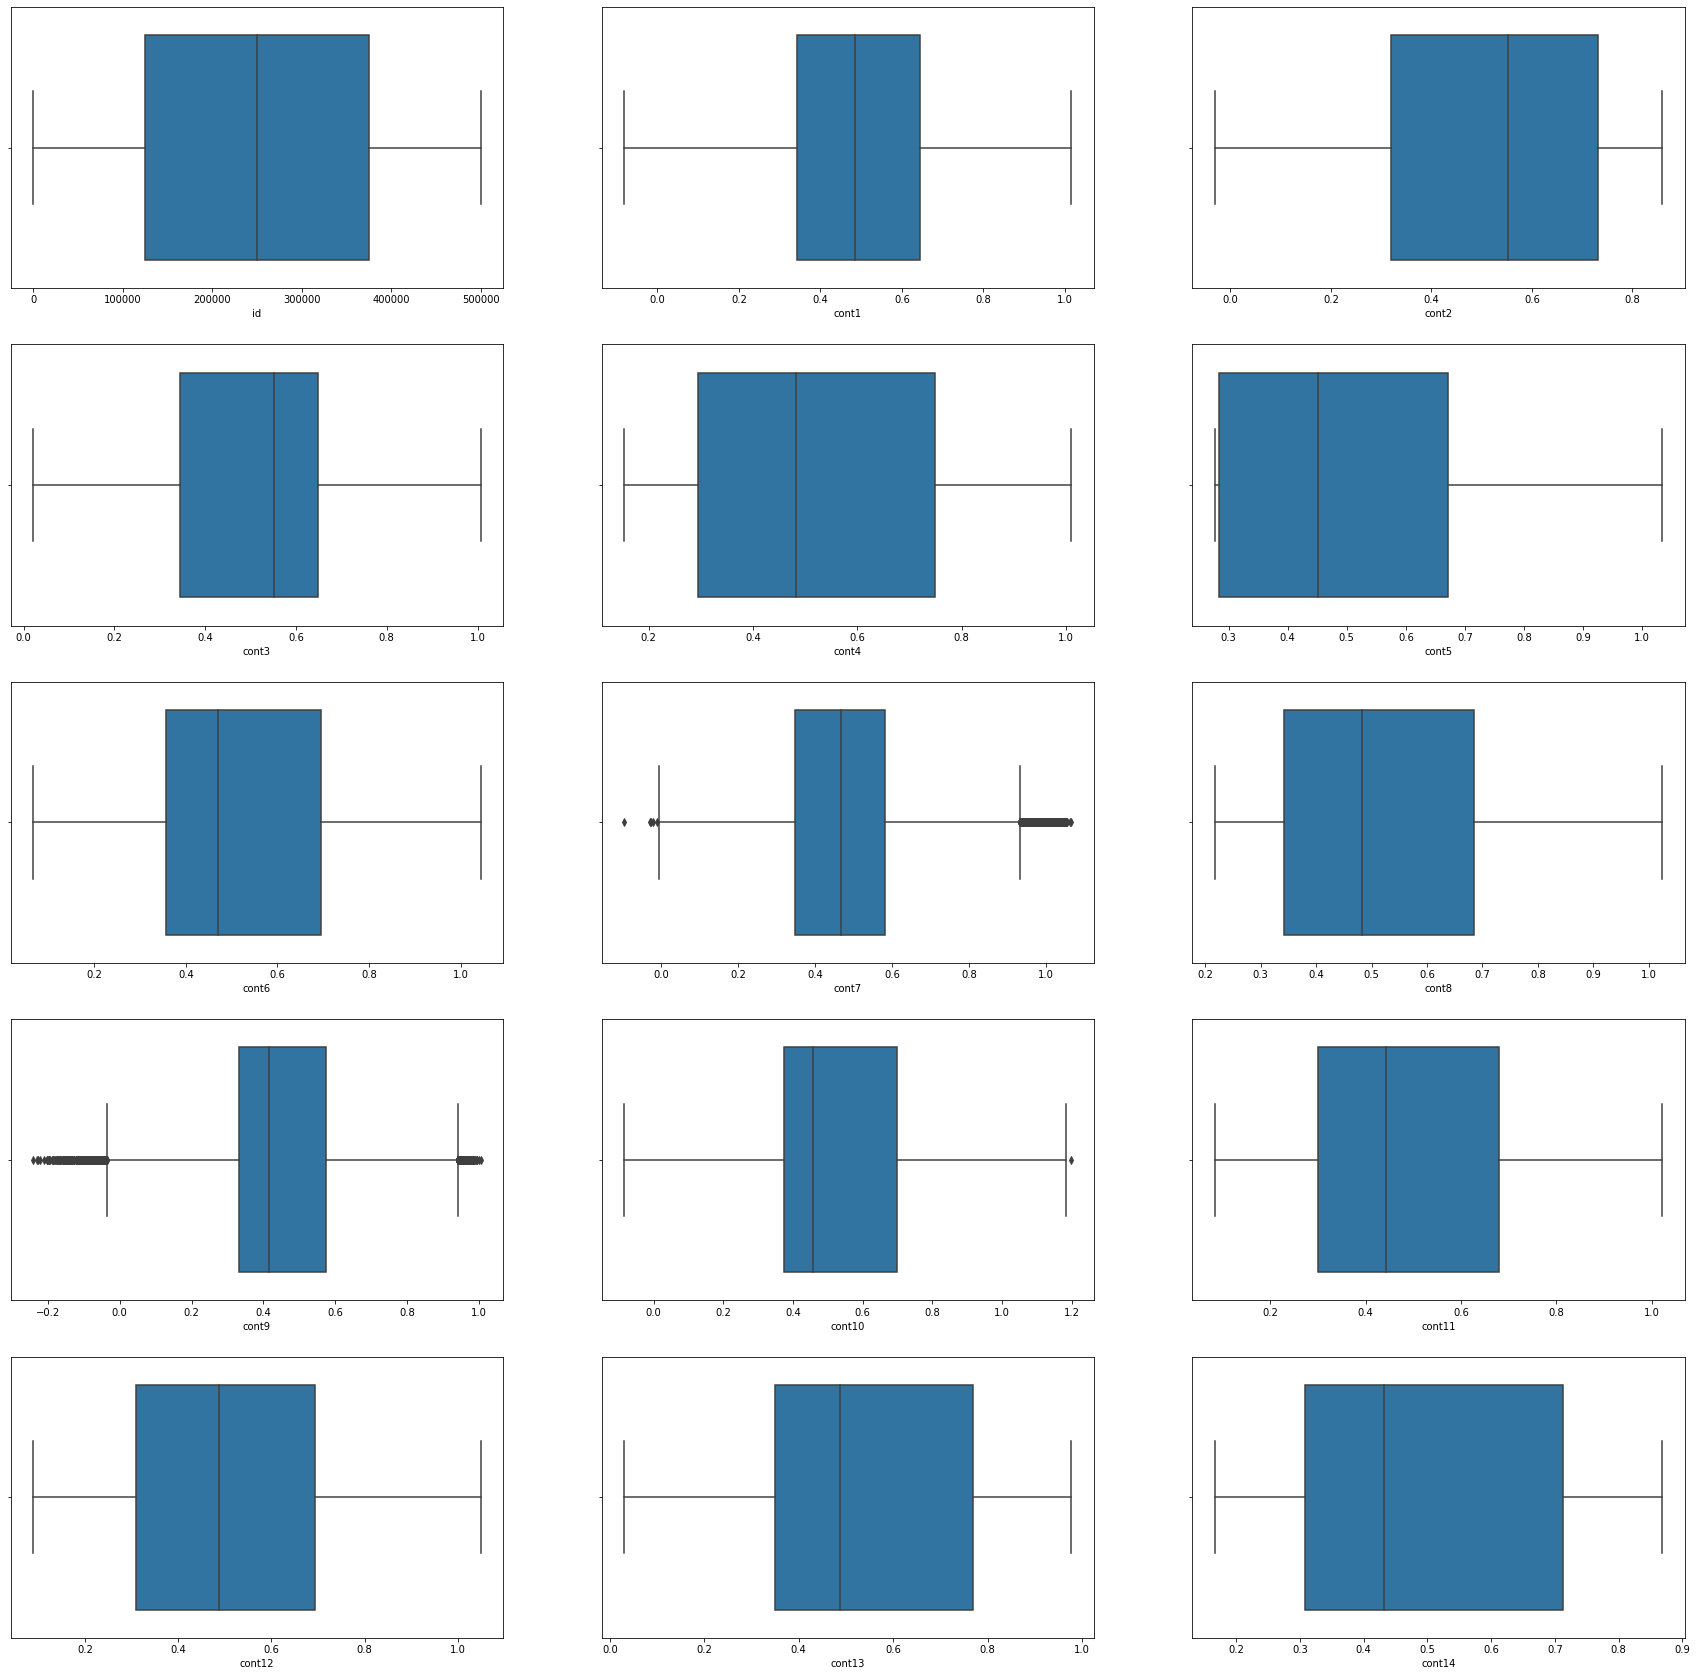

In [38]:
fig,axes = plt.subplots(5,3, figsize=(30,30))
sns.boxplot(x=raw_train_data.id, ax=axes[0,0])
sns.boxplot(x=raw_train_data.cont1, ax=axes[0,1])
sns.boxplot(x=raw_train_data.cont2, ax=axes[0,2])
sns.boxplot(x=raw_train_data.cont3, ax=axes[1,0])
sns.boxplot(x=raw_train_data.cont4, ax=axes[1,1])
sns.boxplot(x=raw_train_data.cont5, ax=axes[1,2])
sns.boxplot(x=raw_train_data.cont6, ax=axes[2,0])
sns.boxplot(x=raw_train_data.cont7, ax=axes[2,1])
sns.boxplot(x=raw_train_data.cont8, ax=axes[2,2])
sns.boxplot(x=raw_train_data.cont9, ax=axes[3,0])
sns.boxplot(x=raw_train_data.cont10, ax=axes[3,1])
sns.boxplot(x=raw_train_data.cont11, ax=axes[3,2])
sns.boxplot(x=raw_train_data.cont12, ax=axes[4,0])
sns.boxplot(x=raw_train_data.cont13, ax=axes[4,1])
sns.boxplot(x=raw_train_data.cont14, ax=axes[4,2])
plt.show()

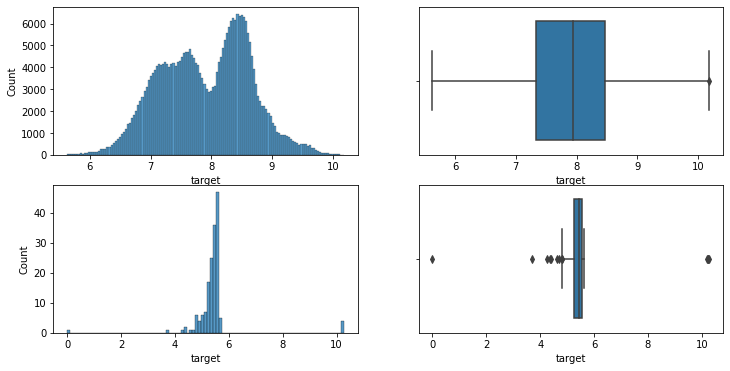

In [39]:
included_entries = raw_train_data[(np.abs(stats.zscore(raw_train_data['target'])) < 3.11)]
excluded_entries = raw_train_data[(np.abs(stats.zscore(raw_train_data['target'])) > 3.11)]
fig,ax = plt.subplots(2,2, figsize=(12,6))
sns.histplot(x=included_entries.target, ax=ax[0][0])
sns.boxplot(x=included_entries.target, ax=ax[0][1])
sns.histplot(x=excluded_entries.target, ax=ax[1][0])
sns.boxplot(x=excluded_entries.target, ax=ax[1][1])
plt.show()

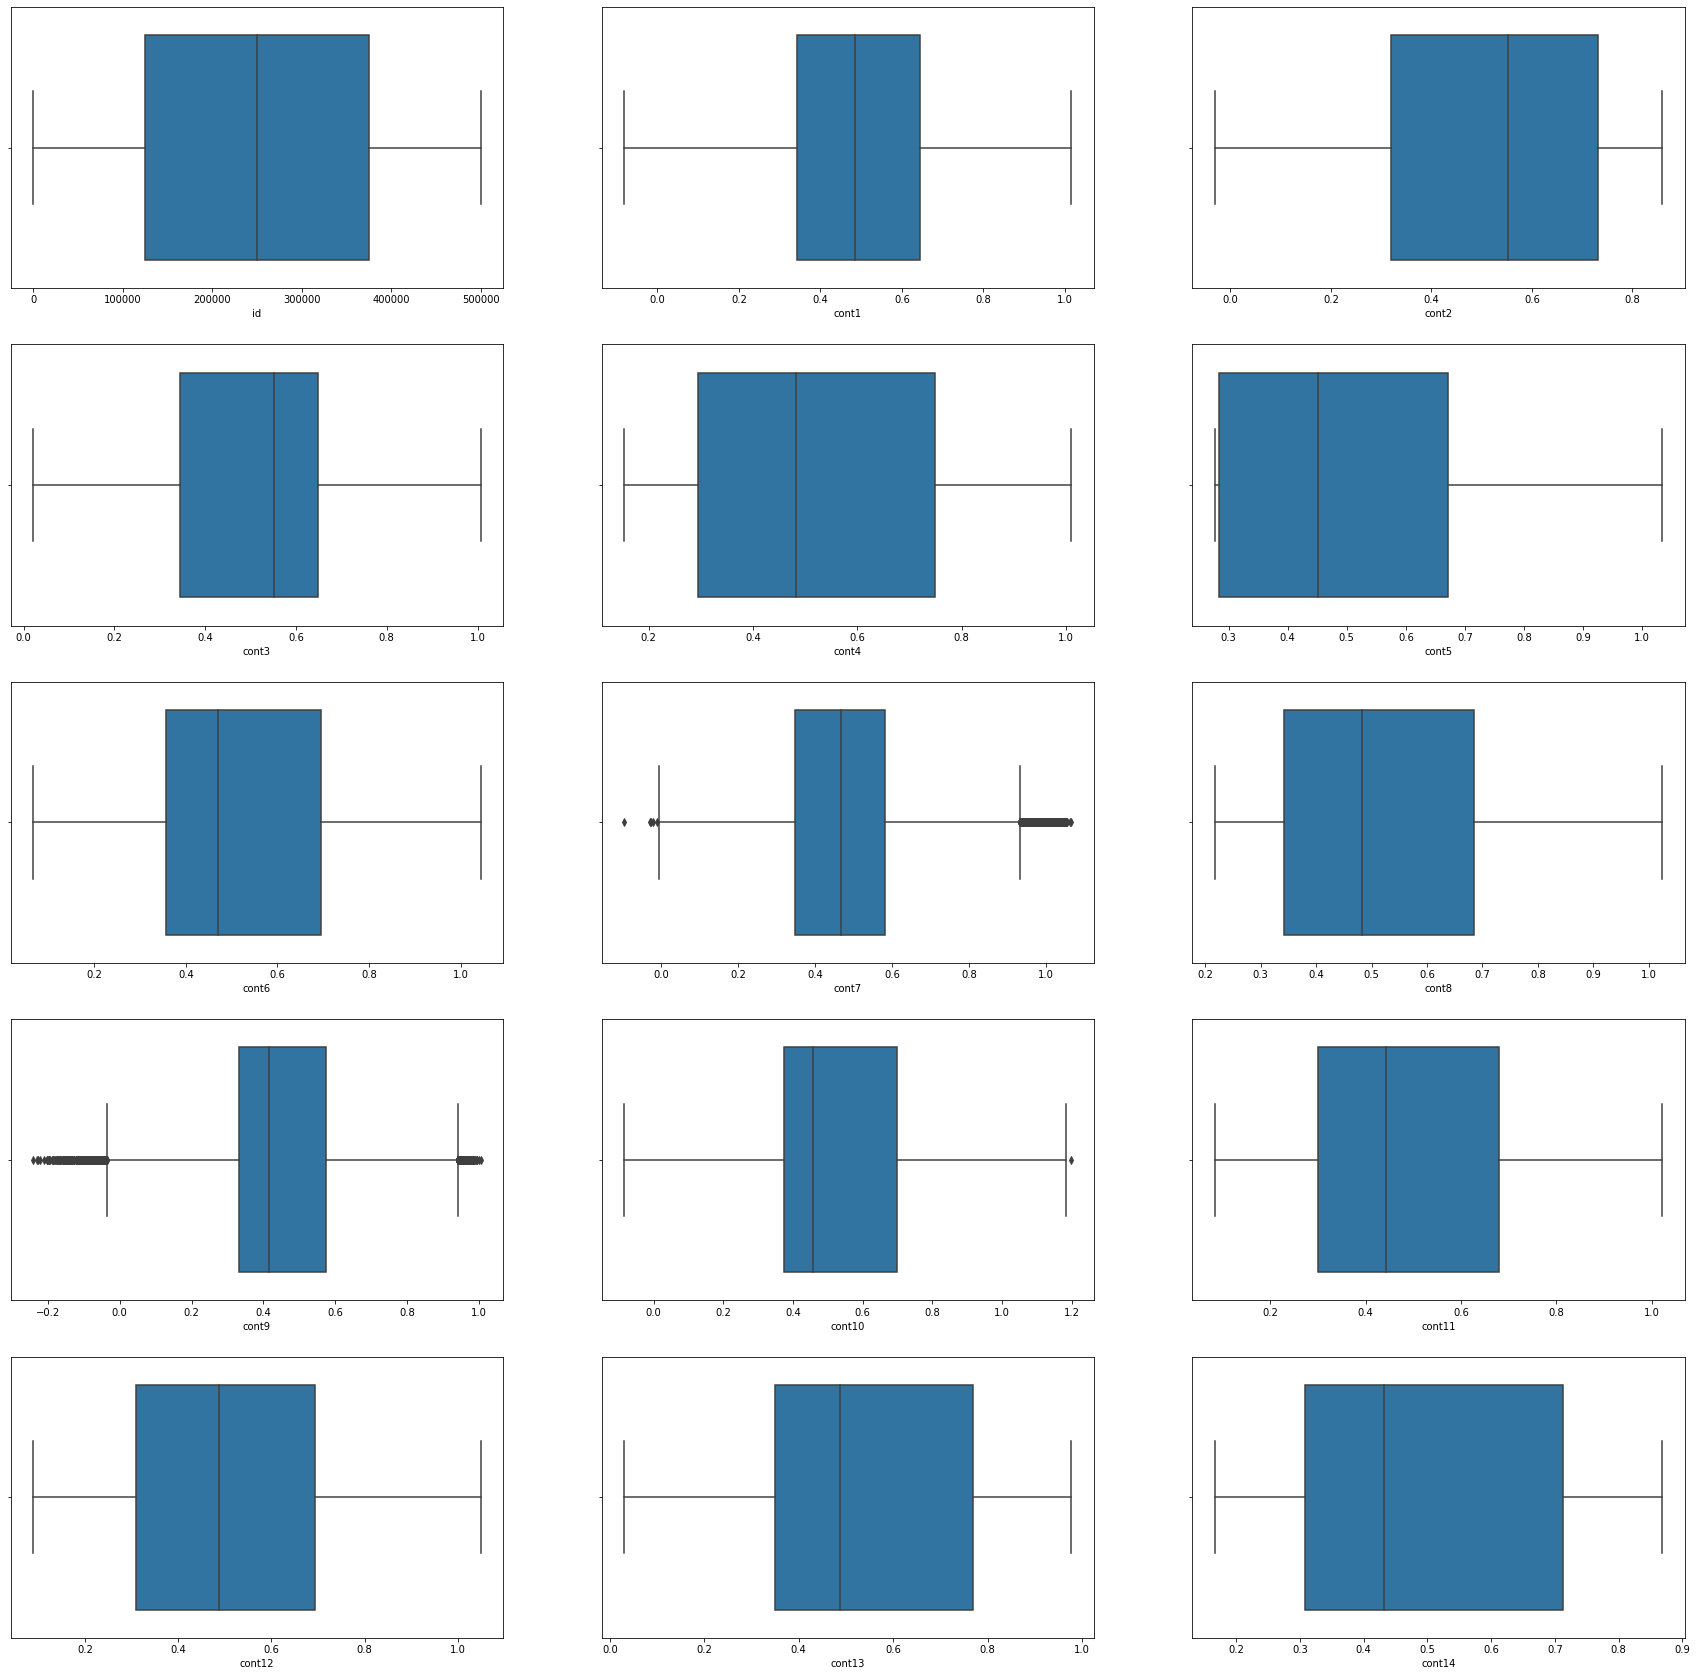

In [40]:
fig,axes = plt.subplots(5,3, figsize=(30,30))
sns.boxplot(x=included_entries.id, ax=axes[0,0])
sns.boxplot(x=included_entries.cont1, ax=axes[0,1])
sns.boxplot(x=included_entries.cont2, ax=axes[0,2])
sns.boxplot(x=included_entries.cont3, ax=axes[1,0])
sns.boxplot(x=included_entries.cont4, ax=axes[1,1])
sns.boxplot(x=included_entries.cont5, ax=axes[1,2])
sns.boxplot(x=included_entries.cont6, ax=axes[2,0])
sns.boxplot(x=included_entries.cont7, ax=axes[2,1])
sns.boxplot(x=included_entries.cont8, ax=axes[2,2])
sns.boxplot(x=included_entries.cont9, ax=axes[3,0])
sns.boxplot(x=included_entries.cont10, ax=axes[3,1])
sns.boxplot(x=included_entries.cont11, ax=axes[3,2])
sns.boxplot(x=included_entries.cont12, ax=axes[4,0])
sns.boxplot(x=included_entries.cont13, ax=axes[4,1])
sns.boxplot(x=included_entries.cont14, ax=axes[4,2])
plt.show()

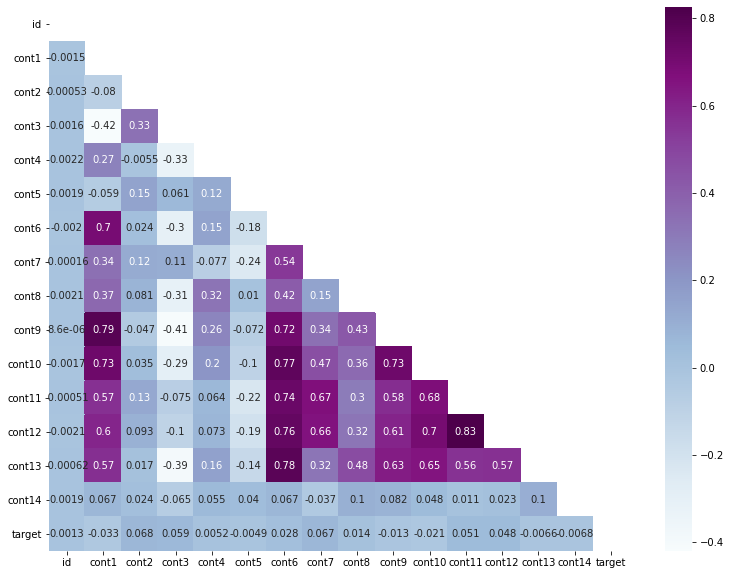

In [42]:
corr=included_entries.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
fig, ax = plt.subplots(figsize=(13,10)) 
sns.heatmap(corr,cmap="BuPu", mask=mask, annot=True)
plt.show()

In [43]:
x = included_entries.drop(["target","id"],axis=1)
y = included_entries.target

In [44]:
import catboost as ctb
model = ctb.CatBoostRegressor(iterations=1000)
model.fit(x,y)

Learning rate set to 0.107717
0:	learn: 0.7286138	total: 30.3ms	remaining: 30.2s
1:	learn: 0.7270441	total: 55.4ms	remaining: 27.7s
2:	learn: 0.7257612	total: 83.1ms	remaining: 27.6s
3:	learn: 0.7245769	total: 113ms	remaining: 28.1s
4:	learn: 0.7234060	total: 145ms	remaining: 28.9s
5:	learn: 0.7223797	total: 176ms	remaining: 29.2s
6:	learn: 0.7215863	total: 206ms	remaining: 29.2s
7:	learn: 0.7207870	total: 232ms	remaining: 28.8s
8:	learn: 0.7201972	total: 260ms	remaining: 28.6s
9:	learn: 0.7195852	total: 286ms	remaining: 28.3s
10:	learn: 0.7190494	total: 313ms	remaining: 28.1s
11:	learn: 0.7185227	total: 341ms	remaining: 28.1s
12:	learn: 0.7181119	total: 369ms	remaining: 28s
13:	learn: 0.7177012	total: 395ms	remaining: 27.8s
14:	learn: 0.7172616	total: 420ms	remaining: 27.6s
15:	learn: 0.7168789	total: 449ms	remaining: 27.6s
16:	learn: 0.7165122	total: 478ms	remaining: 27.7s
17:	learn: 0.7161294	total: 507ms	remaining: 27.6s
18:	learn: 0.7157880	total: 541ms	remaining: 27.9s
19:	learn:

In [45]:
raw_test_data.astype({'id': 'int32'}).dtypes
vector_data = raw_test_data[
    ['cont1', 'cont2', 'cont3', 'cont4', 'cont5', 'cont6', 'cont7', 'cont8', 'cont9', 'cont10', 'cont11', 'cont12',
     'cont13', 'cont14']] 

In [46]:
preds = model.predict(vector_data)

In [49]:
result = []
x = 0
for index, row in raw_test_data.iterrows():
    result.append([int(row['id']), preds[x]])
    x += 1

In [63]:
best_sub = pd.read_csv('..\\kaggle_data\\18-01-2021_18-32-17_submission.csv')

In [64]:
def generate(main, support, coeff):
    
    g = main.copy()    
    for i in main.columns[1:]:
        
        res = []
        lm, Is = [], []        
        lm = main[i].tolist()
        ls = support[i].tolist()  
        
        for j in range(len(main)):
            res.append((lm[j] * coeff) + (ls[j] * (1.- coeff)))            
        g[i] = res
        
    return g  

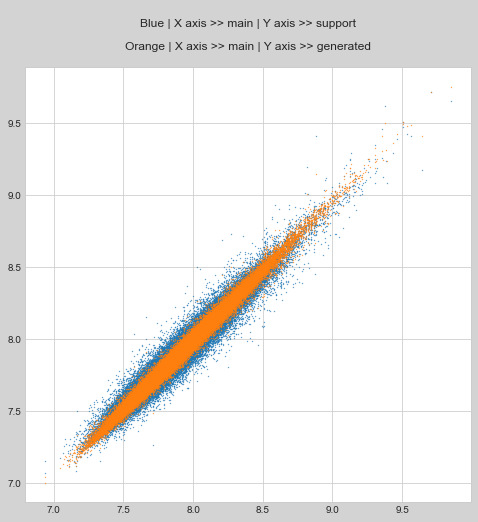

   id    target
0   0  7.949304
1   2  7.865248
2   6  7.936445
3   7  8.262917
4  10  8.132977


In [73]:
from datetime import datetime
dt_string = datetime.now().strftime("%d-%m-%Y_%H-%M-%S")

final_df = pd.DataFrame(result, columns=['id', 'target'])
#final_df.to_csv(f'..\\kaggle_data\\{dt_string}_submission.csv', index=False)

final_df.head()

gennerated = generate(previous_sub, final_df, 0.5)

drawing1(best_sub, final_df, gennerated)
print(gennerated.head())

gennerated.to_csv(f'..\\kaggle_data\\{dt_string}_submission.csv', index=False)

In [ ]:
sult = pd.read_csv('sult.csv')
sult2 = pd.read_csv('sult2.csv')

In [ ]:
import math
import sklearn
from sklearn.metrics import mean_squared_error

In [ ]:
mse = mean_squared_error(sult, sult2 )

rmse = math.sqrt(mse)

print(rmse)